In [66]:
pip install missingno


In [93]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn import preprocessing

In [275]:
df =  pd.read_csv('C:/Users/rowan/Desktop/New folder/train.csv', index_col='ID')
test_df =  pd.read_csv('C:/Users/rowan/Desktop/New folder/test2.csv', index_col='ID')


In [276]:
df.shape


(5760, 14)

In [277]:
test_df.shape

(3000, 13)

In [278]:
df.head(5)

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [279]:
df.columns

Index(['Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [280]:
df.dtypes


Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [281]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00
Snowfall (cm),5760.0,0.046302,0.323728,0.0,0.00,0.00,0.000,5.10


In [282]:
df.isna().sum()


Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [283]:
df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df.columns]]
df.columns

Index(['Date', 'Y', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [284]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")


In [285]:
df.insert(1,"Day", df.Date.dt.day)
df.insert(2, "Month", df.Date.dt.month)
df.insert(3, "Year", df.Date.dt.year)
df.insert(4, 'WeekDay',df["Date"].dt.day_name())

In [286]:
test_df['Date'] = pd.to_datetime(test_df['Date'], errors='coerce')


In [287]:
test_df.insert(1,"Day", test_df.Date.dt.day)
test_df.insert(2, "Month", test_df.Date.dt.month)
test_df.insert(3, "Year", test_df.Date.dt.year)
test_df.insert(4, 'WeekDay',test_df["Date"].dt.day_name())

In [288]:
test_df

,Date,Day,Month,Year,WeekDay,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,,,,
5760,2017-12-21,21,12,2017,Thursday,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
5761,2017-12-21,21,12,2017,Thursday,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
5762,2017-12-21,21,12,2017,Thursday,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
5763,2017-12-21,21,12,2017,Thursday,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
5764,2017-12-21,21,12,2017,Thursday,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,30,11,2018,Friday,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,30,11,2018,Friday,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,30,11,2018,Friday,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [291]:
categoryVariableList = ["WeekDay","Seasons","Holiday","Functioning_Day"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [292]:
categoryVariableList = ["WeekDay","Seasons","Holiday","Functioning Day"]
for var in categoryVariableList:
    test_df[var] = test_df[var].astype("category")

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5760 non-null   datetime64[ns]
 1   Day                    5760 non-null   int64         
 2   Month                  5760 non-null   int64         
 3   Year                   5760 non-null   int64         
 4   WeekDay                5760 non-null   category      
 5   Y                      5760 non-null   int64         
 6   Hour                   5760 non-null   int64         
 7   Temperature            5760 non-null   float64       
 8   Humidity               5760 non-null   int64         
 9   Wind_Speed             5760 non-null   float64       
 10  Visibility             5760 non-null   int64         
 11  Dew_Point_Temperature  5760 non-null   float64       
 12  Solar_Radiation        5760 non-null   float64       
 13  Rai

In [294]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5760 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3000 non-null   datetime64[ns]
 1   Day                        3000 non-null   int64         
 2   Month                      3000 non-null   int64         
 3   Year                       3000 non-null   int64         
 4   WeekDay                    3000 non-null   category      
 5   Hour                       3000 non-null   int64         
 6   Temperature(�C)            3000 non-null   float64       
 7   Humidity(%)                3000 non-null   int64         
 8   Wind speed (m/s)           3000 non-null   float64       
 9   Visibility (10m)           3000 non-null   int64         
 10  Dew point temperature(�C)  3000 non-null   float64       
 11  Solar Radiation (MJ/m2)    3000 non-null   float64       
 12  Rai

In [295]:
df.drop_duplicates(keep=False,inplace=True)

In [296]:
df.isna().sum()


Date                     0
Day                      0
Month                    0
Year                     0
WeekDay                  0
Y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_Speed               0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [361]:
df[df.duplicated()].count()

Date                     0
Day                      0
Month                    0
Year                     0
WeekDay                  0
Y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_Speed               0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
label_day_night          0
dtype: int64

In [298]:
df.shape

(5760, 18)

In [299]:
df['Holiday'].value_counts(normalize=True)
# imbalanced

No Holiday    0.958333
Holiday       0.041667
Name: Holiday, dtype: float64

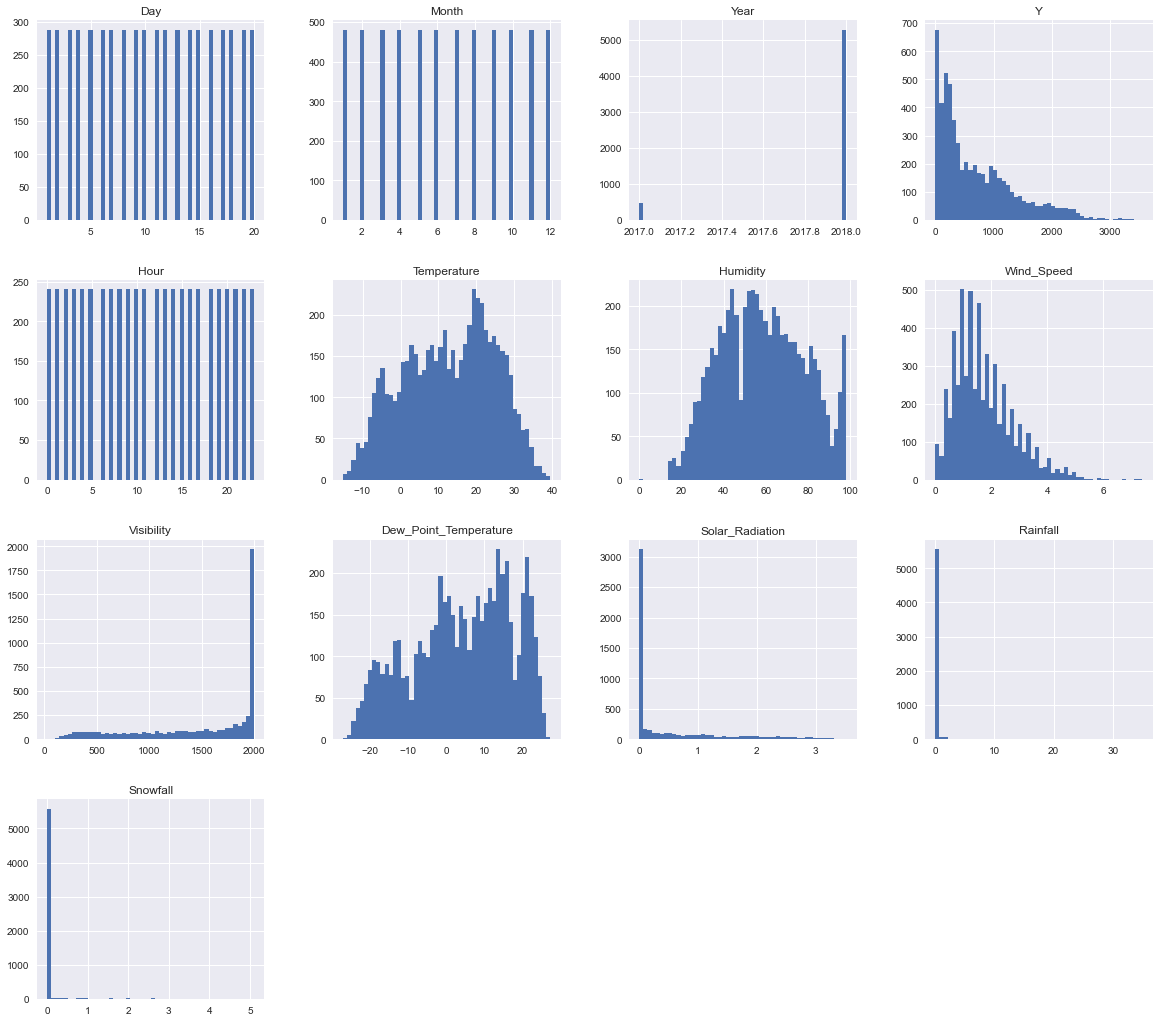

In [300]:
df.hist(bins=50,figsize=(20,18))
plt.show()

In [303]:
df

,Date,Day,Month,Year,WeekDay,Y,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
ID,,,,,,,,,,,,,,,,,,
0,2017-12-01,1,12,2017,Friday,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,1,12,2017,Friday,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,1,12,2017,Friday,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,1,12,2017,Friday,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,1,12,2017,Friday,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2018-11-20,20,11,2018,Tuesday,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
5756,2018-11-20,20,11,2018,Tuesday,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes
5757,2018-11-20,20,11,2018,Tuesday,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [304]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data =df["Y"]
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=188.000, 75th=1066.000, IQR=878.000
Identified outliers: 109
Non-outlier observations: 5651


<AxesSubplot:>

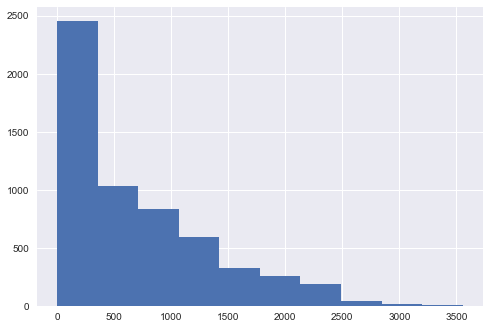

In [305]:
df['Y'].hist()

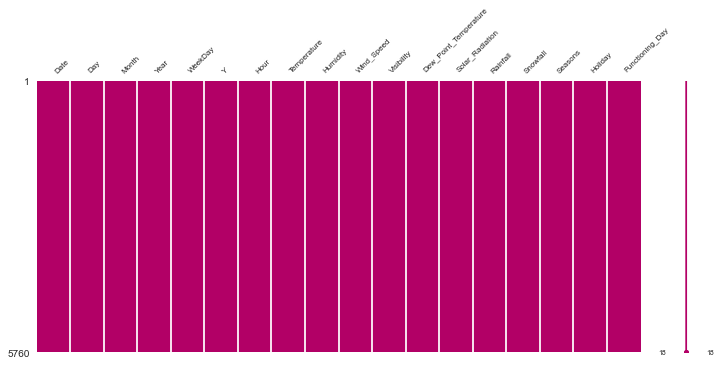

In [306]:
msno.matrix(df,figsize=(12,5),color=(0.7, 0.0, 0.4),fontsize=8)
plt.show()

In [307]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'WeekDay', 'Y', 'Hour', 'Temperature',
       'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point_Temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day'],
      dtype='object')

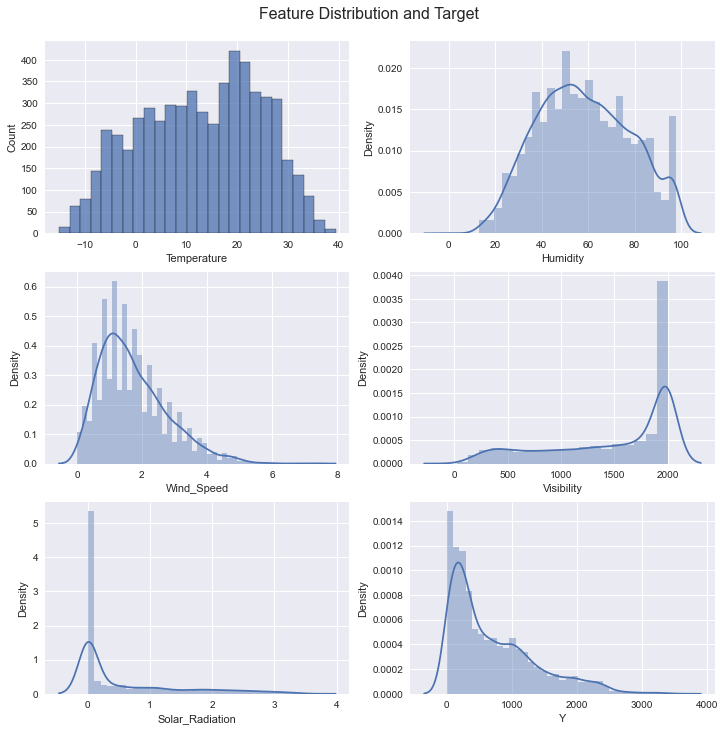

In [308]:
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(3,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.histplot(df.Temperature, ax=ax[0][0])
sns.distplot(df.Humidity, ax=ax[0][1])
sns.distplot(df.Wind_Speed, ax=ax[1][0])
sns.distplot(df.Visibility, ax=ax[1][1])
sns.distplot(df.Solar_Radiation, ax=ax[2][0])
sns.distplot(df.Y, ax=ax[2][1])
plt.show()


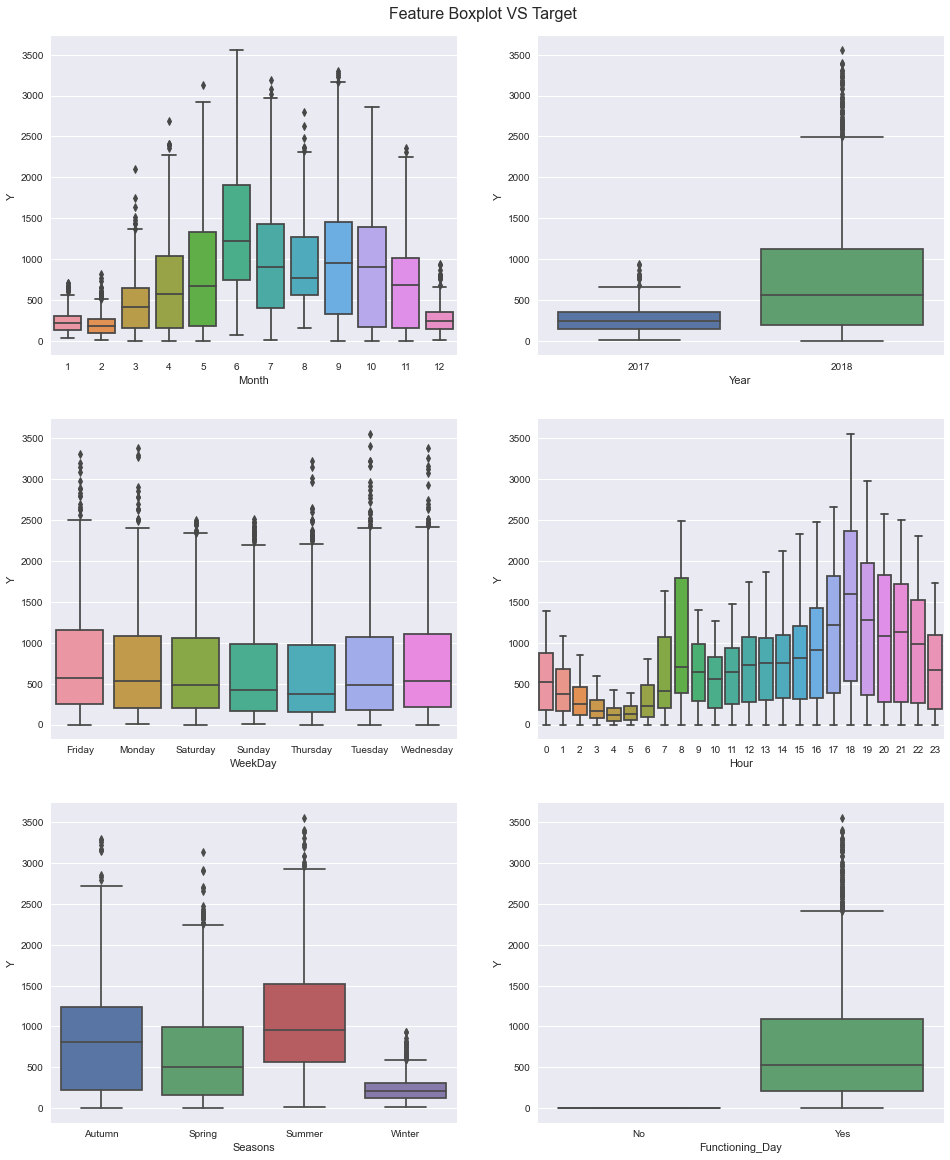

In [310]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(16, 20)

fig.suptitle('Feature Boxplot VS Target', fontsize=16, y=0.9)
# draw boxplot for selected feature with target (Y).
sns.boxplot(data=df,y="Y",x="Month", orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="Y",x="Year",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="Y",x="WeekDay",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="Y",x="Hour",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="Y",x="Seasons",orient="v",ax=axes[2][0])
sns.boxplot(data=df,y="Y",x="Functioning_Day",orient="v",ax=axes[2][1])
plt.show()

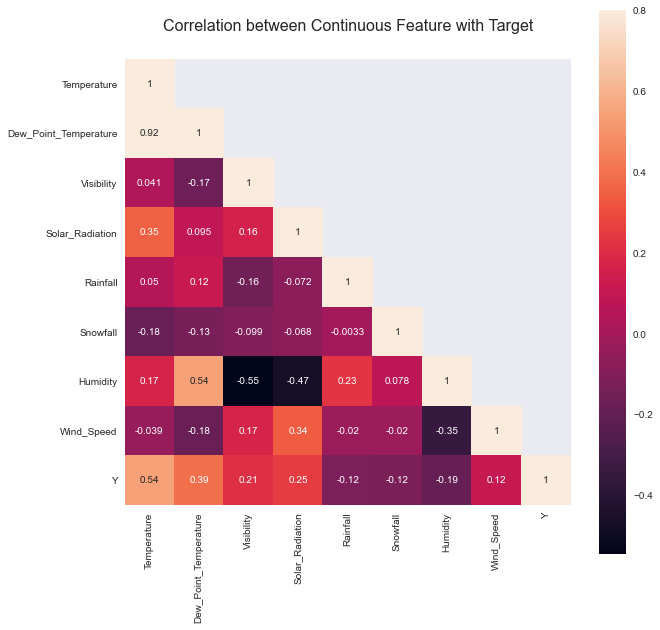

In [318]:
# list of continuous feature
columns = ['Temperature','Dew_Point_Temperature', 'Visibility','Solar_Radiation',
           'Rainfall', 'Snowfall', 'Humidity','Wind_Speed',"Y"]
# calculate correlation matrix.
corrMatt = df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

In [320]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Y'],
                     columns=['Correlation to the target'])
df1Corr

,Correlation to the target
Y,1.000000
Temperature,0.544281
Hour,0.407180
Dew_Point_Temperature,0.392454
Solar_Radiation,0.250601
Visibility,0.214777
Year,0.201837
Month,0.167181
Wind_Speed,0.116380
Day,0.045897


In [321]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<6) else( 'Day'))

<AxesSubplot:ylabel='Y'>

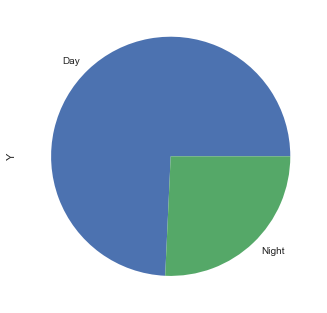

In [323]:
df.groupby('label_day_night').sum()['Y'].plot.pie()

<AxesSubplot:xlabel='Date'>

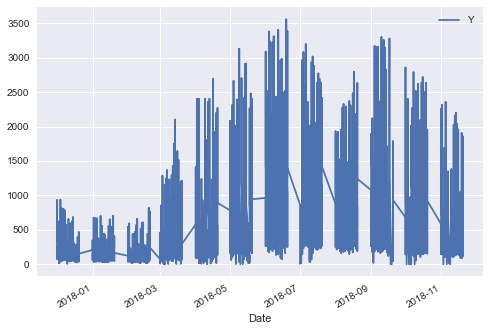

In [327]:
df.plot(x='Date',y='Y',kind='line')

In [328]:
Seasonsvisualize=pd.DataFrame(df.groupby('Seasons').sum()['Y'].sort_values(ascending=False))
Seasonsvisualize

,Y
Seasons,
Summer,1563416
Autumn,1214630
Spring,940276
Winter,333745


In [330]:
summerSolarRelation=pd.DataFrame(df.groupby('Seasons').sum()['Solar_Radiation'].sort_values(ascending=False))
summerSolarRelation

,Solar_Radiation
Seasons,
Summer,1167.96
Spring,905.22
Autumn,781.83
Winter,441.58


<AxesSubplot:ylabel='Y'>

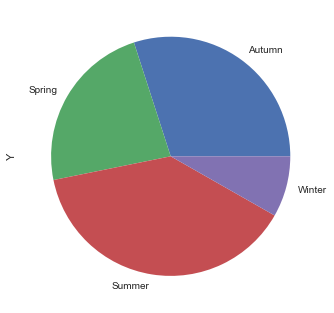

In [331]:
df.groupby('Seasons').sum()['Y'].plot.pie()

<AxesSubplot:xlabel='Solar_Radiation'>

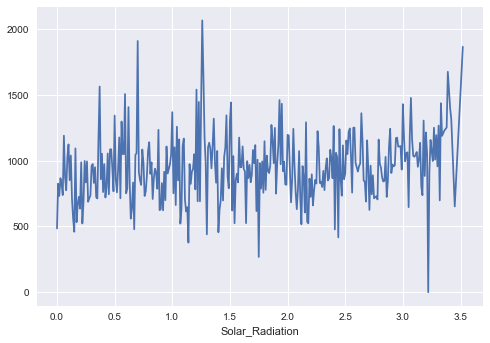

In [333]:
df.groupby('Solar_Radiation').mean()['Y'].plot()

<AxesSubplot:xlabel='Hour'>

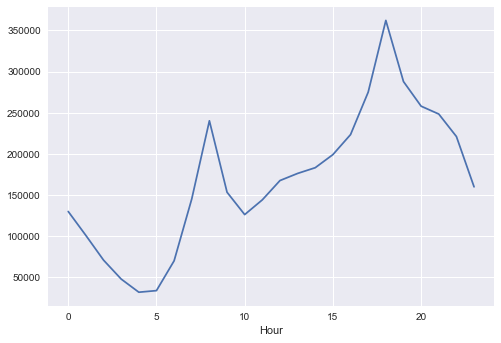

In [334]:
df.groupby('Hour').sum()['Y'].plot()

In [335]:
highrenteddays=pd.DataFrame(df.groupby('WeekDay').sum()['Y'].sort_values(ascending=False))
highrenteddays

,Y
WeekDay,
Friday,646191
Monday,612065
Tuesday,594777
Wednesday,592134
Saturday,556266
Sunday,538443
Thursday,512191


<AxesSubplot:xlabel='Temperature'>

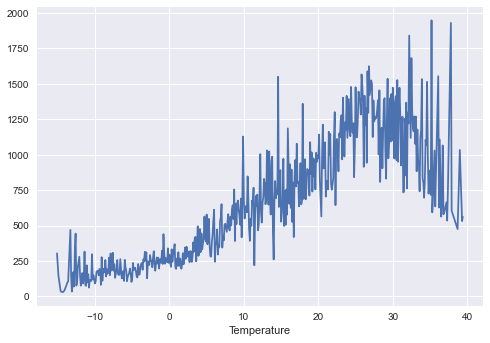

In [336]:
df.groupby('Temperature').mean()['Y'].plot()

<AxesSubplot:ylabel='Y'>

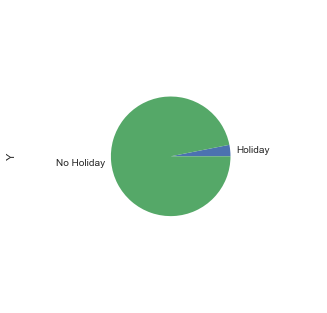

In [337]:
df.groupby('Holiday').sum()['Y'].plot.pie(radius=0.5)


<AxesSubplot:xlabel='Rainfall'>

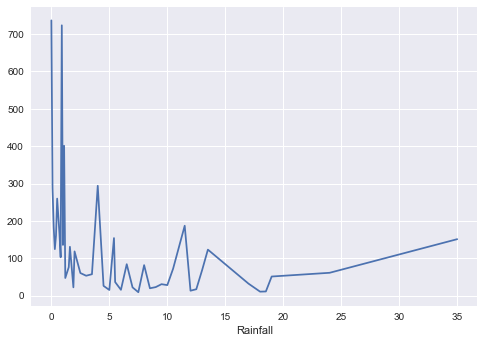

In [338]:
df.groupby('Rainfall').mean()['Y'].plot()

<AxesSubplot:xlabel='Snowfall'>

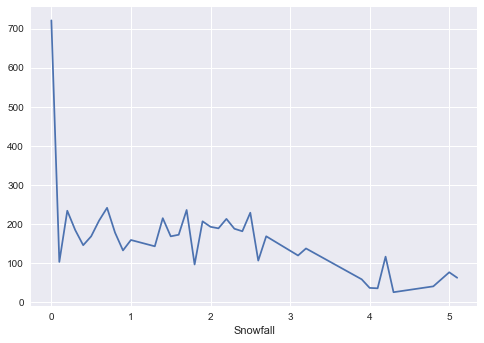

In [339]:
df.groupby('Snowfall').mean()['Y'].plot()

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5760 non-null   datetime64[ns]
 1   Day                    5760 non-null   int64         
 2   Month                  5760 non-null   int64         
 3   Year                   5760 non-null   int64         
 4   WeekDay                5760 non-null   category      
 5   Y                      5760 non-null   int64         
 6   Hour                   5760 non-null   int64         
 7   Temperature            5760 non-null   float64       
 8   Humidity               5760 non-null   int64         
 9   Wind_Speed             5760 non-null   float64       
 10  Visibility             5760 non-null   int64         
 11  Dew_Point_Temperature  5760 non-null   float64       
 12  Solar_Radiation        5760 non-null   float64       
 13  Rai

In [389]:
df

,Date,Day,Month,Year,WeekDay,Y,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,label_day_night,WeekDay2
ID,,,,,,,,,,,,,,,,,,,,
0,2017-12-01,1,12,2017,Friday,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,Night,7
1,2017-12-01,1,12,2017,Friday,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,Night,7
2,2017-12-01,1,12,2017,Friday,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,Yes,Night,7
3,2017-12-01,1,12,2017,Friday,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,Night,7
4,2017-12-01,1,12,2017,Friday,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,Yes,Night,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2018-11-20,20,11,2018,Tuesday,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,1,Yes,Day,4
5756,2018-11-20,20,11,2018,Tuesday,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,1,Yes,Day,4
5757,2018-11-20,20,11,2018,Tuesday,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,1,Yes,Night,4


In [400]:
Season =         {'Winter':1, 
                'Summer':2,
                'Autumn':3,
                'Spring':4
}

# Map feature values to scale
df['Season2'] = df['Seasons'].replace(Season)


Day =         {'Saturday':1, 
                'Sunday':2,
                'Monday':3,
                'Tuesday':4,
                'Wednesday':5,
                'Thursday':6,
                'Friday':7,
}

# Map feature values to scale
df['WeekDay2'] = df['WeekDay'].replace(Day)


fday = {'Yes':1, 
                'No':2
}

df['Functioning_Day2'] = df['Functioning_Day'].replace(fday)




In [ ]:
#modeling

In [406]:
features=['Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Season2',
       'Holiday', 'Functioning_Day2', 'Year', 'Month', 'WeekDay2']
X=df[features]
y=df['Y']

In [407]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 42)

In [408]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predict_val = forest_model.predict(val_X)
print(mean_absolute_error(val_y, predict_val))

104.2296111111111


In [416]:
test_df

,Date,Day,Month,Year,WeekDay,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Season2,WeekDay2,Functioning_Day2
ID,,,,,,,,,,,,,,,,,,,,
5760,2017-12-21,21,12,2017,Thursday,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes,1,6,1
5761,2017-12-21,21,12,2017,Thursday,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes,1,6,1
5762,2017-12-21,21,12,2017,Thursday,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes,1,6,1
5763,2017-12-21,21,12,2017,Thursday,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes,1,6,1
5764,2017-12-21,21,12,2017,Thursday,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,30,11,2018,Friday,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,3,7,1
8756,2018-11-30,30,11,2018,Friday,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,3,7,1
8757,2018-11-30,30,11,2018,Friday,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,3,7,1


In [417]:
Season =         {'Winter':1, 
                'Summer':2,
                'Autumn':3,
                'Spring':4
}

# Map feature values to scale
test_df['Season2'] = test_df['Seasons'].replace(Season)


Day =         {'Saturday':1, 
                'Sunday':2,
                'Monday':3,
                'Tuesday':4,
                'Wednesday':5,
                'Thursday':6,
                'Friday':7,
}

# Map feature values to scale
test_df['WeekDay2'] = test_df['WeekDay'].replace(Day)


fday = {'Yes':1, 
                'No':2
}

test_df['Functioning_Day2'] = test_df['Functioning Day'].replace(fday)


holi = {'No Holiday':1,
        'Holiday':0
    
}

test_df['Holiday2'] = test_df['Holiday'].replace(holi)


In [419]:
feature=['Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Season2',
       'Holiday2', 'Functioning_Day2', 'Year', 'Month', 'WeekDay2']
X_test=test_df[feature]

predict = forest_model.predict(X_test)


In [438]:
test_df.reset_index(inplace=True)


In [439]:
test_df['y'] = predict
test_df[['ID', 'y']].to_csv('submission.csv', index=False)
result=test_df[['ID', 'y']]
result.head(20)

,ID,y
0,5760,152.96
1,5761,157.45
2,5762,128.44
3,5763,91.95
4,5764,63.09
5,5765,62.06
6,5766,137.27
7,5767,313.47
8,5768,555.07
9,5769,270.46
